In [4]:
import numpy as np 

In [5]:
rng = np.random.default_rng(seed = 1234)
cl1 = rng.multivariate_normal([-2,-2], [[1,-0.5],[-0.5,1]], size=100)
cl2 = rng.multivariate_normal([1,0], [[1,0],[0,1]], size=150)
cl3 = rng.multivariate_normal([3,2], [[1,-0.7],[-0.7,1]], size=200)
pts = np.concatenate((cl1,cl2,cl3))

In [6]:
import matplotlib.pyplot as plt 

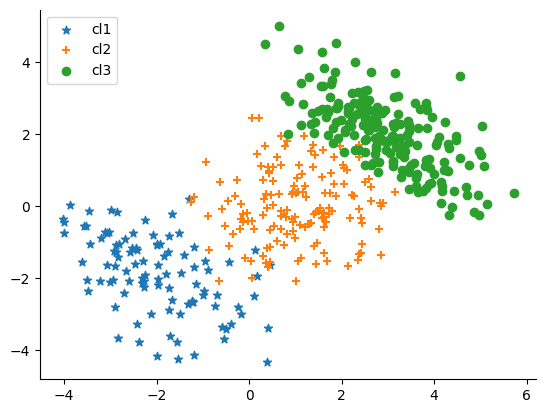

In [7]:
fig, ax = plt.subplots()
#plt.grid(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.scatter(cl1[:,0], cl1[:,1], marker="*", label="cl1")
plt.scatter(cl2[:,0], cl2[:,1], marker="+", label="cl2")
plt.scatter(cl3[:,0], cl3[:,1], label="cl3")
plt.legend()
plt.savefig("../images/kmeans_data.pdf")

## Using k-means 

In [8]:
from scipy.cluster.vq import kmeans
ctr, dist = kmeans(pts, 3)

In [9]:
ctr

array([[ 2.84494325,  1.95323228],
       [-2.03956666, -1.85662027],
       [ 0.91376555, -0.21935255]])

In [10]:
[cl1.mean(axis=0),
cl2.mean(axis=0),
cl3.mean(axis=0)]


[array([-2.00474615, -1.87275596]),
 array([1.03849018, 0.01417119]),
 array([2.94641907, 2.02514165])]

In [11]:
dist 

1.2204335829465707

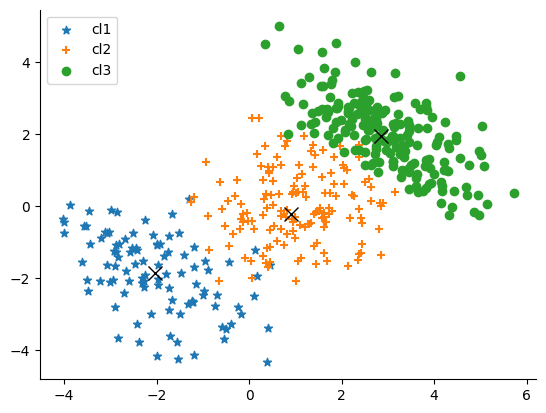

In [12]:
fig, ax = plt.subplots()
#plt.grid(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.scatter(cl1[:,0], cl1[:,1], marker="*", label="cl1")
plt.scatter(cl2[:,0], cl2[:,1], marker="+", label="cl2")
plt.scatter(cl3[:,0], cl3[:,1], label="cl3")

plt.plot(ctr[:,0],ctr[:,1],"x", color="black",markersize=10)
plt.legend()

In [13]:
kmeans?

In [15]:
err = [0., 0., 0.]
cls = [cl1, cl2, cl3]
for i in range(3): 
    for pt in cls[i] : 
        err[i] += np.linalg.norm(np.array(pt)-np.array(cls[i].mean(axis=0)))
np.array(err)/len(pts)

array([0.30098184, 0.41720274, 0.53675941])

In [16]:
sum(np.array(err)/len(pts))/3

0.41831466353415375

In [17]:
ks = range(1,10)
dists = [kmeans(pts, k)[1] for k in ks]
np.array(dists).reshape((-1,1))

array([[2.5470307 ],
       [1.56992843],
       [1.22112476],
       [1.04596422],
       [0.95276236],
       [0.87987903],
       [0.81723123],
       [0.76636289],
       [0.73315798]])

## k-means distortion plot

The mean (non-squared) Euclidean distance between the observations passed and the centroids generated.


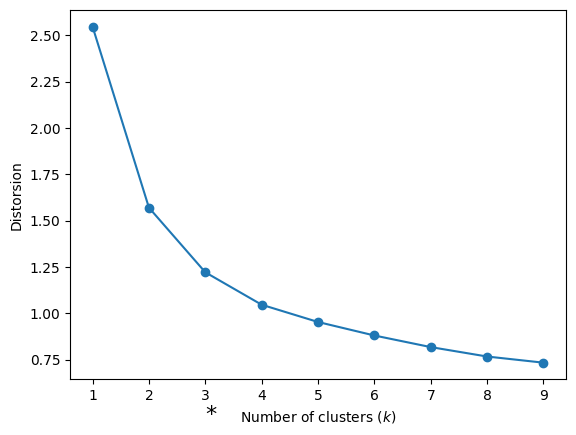

In [18]:
plt.plot(range(1,10),dists, "o-")
plt.text(3,0.4183, "*", fontsize=16 )
plt.xlabel(r"Number of clusters ($k$)")
plt.ylabel(r"Distorsion")
plt.show()

## Example 2 - Numerical intgrations: normal distribution

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2)
$$


In [19]:
def norm_pdf(x, mu, sigma):
	return (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)


In [20]:
norm_pdf(0,0,1)

0.3989422804014327

In [21]:
norm_pdf(np.Inf, 0, 1)

0.0

In [22]:
norm_pdf(-np.Inf, 0, 1)

0.0

In [23]:
from scipy.integrate import quad
quad(lambda x: x, 0, 1)

(0.5, 5.551115123125783e-15)

In [24]:
quad(lambda x: norm_pdf(x, 0, 1), -np.inf, np.inf)

(0.9999999999999997, 1.0178191380347127e-08)

In [25]:
quad(lambda x: norm_pdf(x, 17, 12), -np.inf, np.inf)

(1.0000000000000002, 4.113136862574909e-09)

## Example 2 - Numerical integrations: truncated normals


$$
	\begin{cases}
		f(x) = \frac{c}{\sigma \sqrt{2\pi}} \exp(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2), & \text{for } a \leq x \leq b \\
		0, & otherwise.
	\end{cases}
	$$

In [26]:
def trunc_norm_pdf(x, mu=0, sigma=1, a=-np.inf, b=np.inf):
    if (b < a):
        raise ValueError("b must be greater than a")
    x = np.asarray(x).reshape(-1)
    full_pdf = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    full_pdf[(x < a) | (x > b)] = 0
    return full_pdf

In [27]:
trunc_norm_pdf(0, a=-1, b=1)


array([0.39894228])

In [28]:
trunc_norm_pdf(2, a=-1, b=1)


array([0.])

In [29]:
trunc_norm_pdf(-2, a=-1, b=1)

array([0.])

In [30]:
quad(lambda x: trunc_norm_pdf(x, a=-1, b=1), -np.inf, np.inf)

(0.682689492137086, 2.0147661317082566e-11)

In [31]:
quad(lambda x: trunc_norm_pdf(x, a=-3, b=3), -np.inf, np.inf)

(0.9973002039367396, 7.451935936375609e-09)

## Example 2 - Numerical integrations: fixing our function

In [32]:
def trunc_norm_pdf(x, mu=0, sigma=1, a=-np.inf, b=np.inf):
    if (b < a):
        raise ValueError("b must be greater than a")
    x = np.asarray(x).reshape(-1)
    nc = 1. / quad(lambda x: norm_pdf(x, mu, sigma), a, b)[0]
    full_pdf = (nc/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    full_pdf[(x < a) | (x > b)] = 0
    return full_pdf

In [33]:
trunc_norm_pdf(0, a=-1, b=1)

array([0.58436857])

In [34]:
trunc_norm_pdf(2, a=-1, b=1)

array([0.])

In [35]:
quad(lambda x: trunc_norm_pdf(x, a=-1, b=1), -np.inf, np.inf)

(1.0, 2.9512170485190836e-11)

In [36]:
quad(lambda x: trunc_norm_pdf(x, a=-3, b=3), -np.inf, np.inf)

(0.9999999999999998, 7.472109098127788e-09)

## Example 2 - Numerical integrations: multivariate normal

$$f(x) = \det (\mathbf{2} \mathbf{\pi}\Sigma) ^{-\frac{1}{2}} \exp(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}))$$

In [37]:
def mv_norm(x, mu, sigma):
    x = np.asarray(x)
    mu = np.asarray(mu)
    sigma = np.asarray(sigma)
    return np.linalg.det(2*np.pi*sigma)**(-0.5) * np.exp(-0.5 * (x - mu).T @ np.linalg.solve(sigma, (x-mu)) )

In [38]:
norm_pdf(0,0,1)

0.3989422804014327

In [39]:
mv_norm([0], [0], [[1]])

0.3989422804014327

In [40]:
from scipy.integrate import dblquad, tplquad

In [41]:
dblquad(lambda x, y: mv_norm([x,y], [0,0], np.identity(2)),a=-np.inf, b=np.inf, 
gfun=lambda x: -np.inf,   hfun=lambda x: np.inf)

(1.0000000000000322, 1.3150127836595985e-08)

In [42]:
gfun=lambda x:   0
hfun=lambda x:   np.inf
qfun=lambda x,y: 0
rfun=lambda x,y: np.inf
dfun = lambda z, y, x: mv_norm([x,y,z], [0,0,0], np.identity(3))

In [43]:
%timeit tplquad(dfun,a=0, b=np.inf, gfun=gfun, hfun=hfun, qfun=qfun, rfun=rfun)

5.29 s ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
tplquad(dfun,a=0, b=np.inf, gfun=gfun, hfun=hfun, qfun=qfun, rfun=rfun)

(0.12500000000036066, 1.4697203688867502e-08)

## Example 3 - (Very) Basic optimization: scalar function minimization

In [45]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

In [46]:
x = np.linspace(-8, 5, 200)
y = f(x)

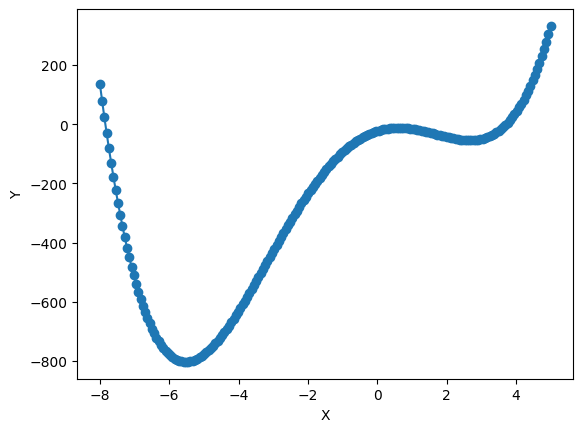

In [47]:
plt.plot(x, y , "o-")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/saclar_function.pdf")
plt.show()

## Local minima problem 

In [48]:
def f(x):
    return -np.sinc(x-5)

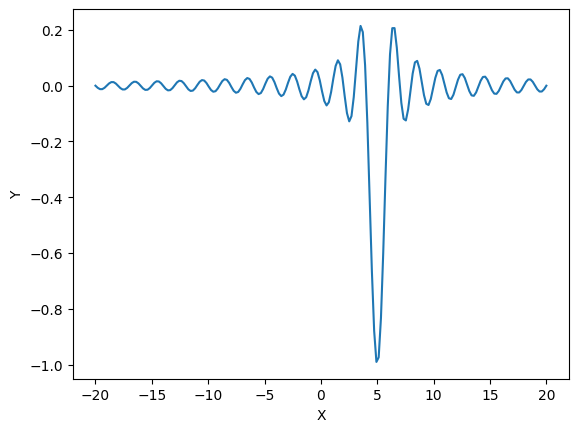

In [49]:
x = np.linspace(-20, 20, 200)
y = f(x)
plt.plot(x, y , "-")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/sin_function.pdf")
plt.show()

In [50]:
from scipy.optimize import minimize_scalar

In [51]:
res = minimize_scalar(f)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.049029624014074166
       x: -1.4843871263953001
     nit: 10
    nfev: 14

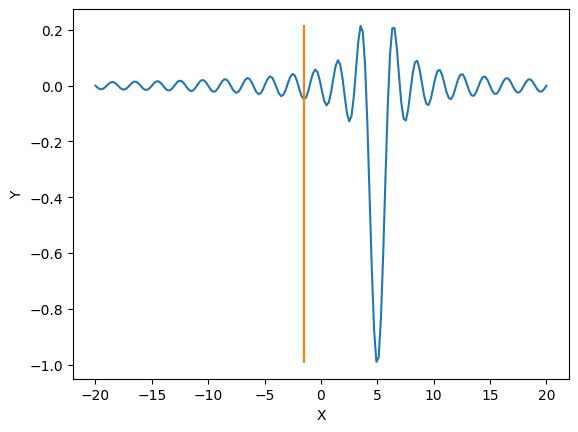

In [52]:
plt.plot(x, y , "-")
plt.plot([res.x]*len(y), y)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/sin_function_min.pdf")
plt.show()

In [53]:

rng = np.random.default_rng(seed=1234)
lower = rng.uniform(-20, 20, 100)
upper = lower + 1
sols = [minimize_scalar(f, bracket=(l,u)) for l,u in zip(lower, upper)]
funs = [sol.fun for sol in sols]
best = sols[np.argmin(funs)]
best

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 5.000000000618556
     nit: 8
    nfev: 11

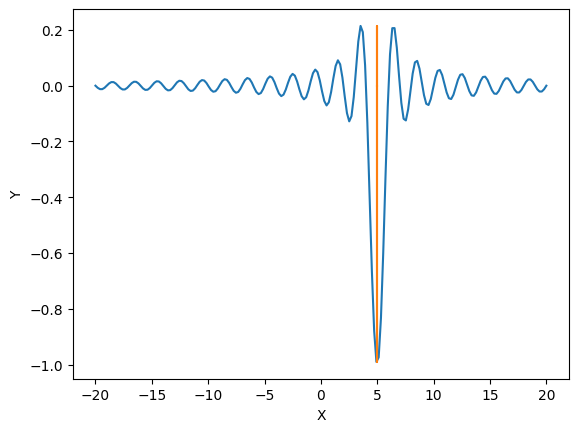

In [54]:
plt.plot(x, y , "-")
plt.plot([best.x]*len(y), y)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("../images/sin_function_best.pdf")
plt.show()

In [55]:
from scipy.spatial import KDTree

In [56]:
rng = np.random.default_rng(seed=12345)
pts = rng.multivariate_normal(
  [0,0], [[1,.8],[.8,1]], 
  size=10
)
pts

array([[ 0.951133  ,  1.75038506],
       [ 0.90794002,  0.74402448],
       [ 0.30576524, -0.16281136],
       [ 1.09240417,  1.50280001],
       [ 0.27501972, -0.96007933],
       [-2.53321395, -1.92068272],
       [ 0.43511779,  1.00571808],
       [ 0.46218239,  0.42379897],
       [-0.3509701 , -1.14575681],
       [-0.98870241, -0.1039104 ]])

0 [0.951133   1.75038506]
1 [0.90794002 0.74402448]
2 [ 0.30576524 -0.16281136]
3 [1.09240417 1.50280001]
4 [ 0.27501972 -0.96007933]
5 [-2.53321395 -1.92068272]
6 [0.43511779 1.00571808]
7 [0.46218239 0.42379897]
8 [-0.3509701  -1.14575681]
9 [-0.98870241 -0.1039104 ]


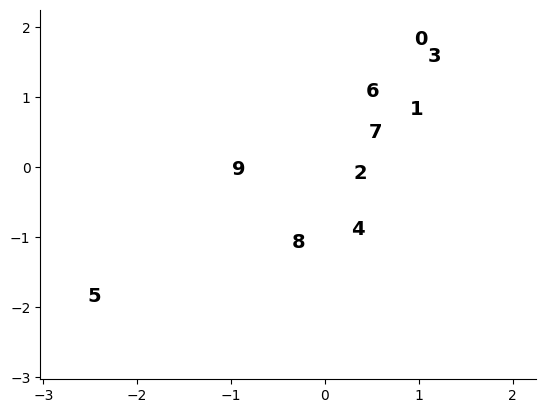

In [57]:

fig, ax = plt.subplots()
#plt.grid(True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlim((np.min(pts)-0.5, np.max(pts)+0.5))
plt.ylim((np.min(pts)-0.5, np.max(pts)+0.5))
for i, pt in enumerate(pts) : 
    print(i, pt)
    plt.text(pt[0], pt[1], str(i), fontsize=14, weight="bold")
plt.savefig("../images/kdtree.pdf")
plt.show()

In [58]:
kd = KDTree(pts)

In [59]:
kd 

In [60]:
dir(kd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_weights',
 'boxsize',
 'count_neighbors',
 'data',
 'indices',
 'innernode',
 'leafnode',
 'leafsize',
 'm',
 'maxes',
 'mins',
 'n',
 'node',
 'query',
 'query_ball_point',
 'query_ball_tree',
 'query_pairs',
 'size',
 'sparse_distance_matrix',
 'tree']

In [61]:
dist, i = kd.query(pts[6, :], k=3)

In [62]:
dist 

array([0.        , 0.54041133, 0.58254815])

In [63]:
i

array([6, 1, 7])

In [64]:
import scipy 

In [65]:
kd.data

array([[ 0.951133  ,  1.75038506],
       [ 0.90794002,  0.74402448],
       [ 0.30576524, -0.16281136],
       [ 1.09240417,  1.50280001],
       [ 0.27501972, -0.96007933],
       [-2.53321395, -1.92068272],
       [ 0.43511779,  1.00571808],
       [ 0.46218239,  0.42379897],
       [-0.3509701 , -1.14575681],
       [-0.98870241, -0.1039104 ]])

In [66]:
dir(kd.leafnode.children)

['__class__',
 '__delattr__',
 '__delete__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__isabstractmethod__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__set__',
 '__set_name__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'deleter',
 'fdel',
 'fget',
 'fset',
 'getter',
 'setter']

In [67]:
from scipy.spatial import ConvexHull

In [68]:
hull = ConvexHull(pts)
hull 

In [69]:
dir(hull)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_update',
 '_vertices',
 'add_points',
 'area',
 'close',
 'coplanar',
 'equations',
 'good',
 'max_bound',
 'min_bound',
 'ndim',
 'neighbors',
 'npoints',
 'nsimplex',
 'points',
 'simplices',
 'vertices',
 'volume']

In [70]:
hull.simplices

array([[0, 3],
       [4, 5],
       [9, 5],
       [9, 0],
       [1, 3],
       [1, 4]], dtype=int32)

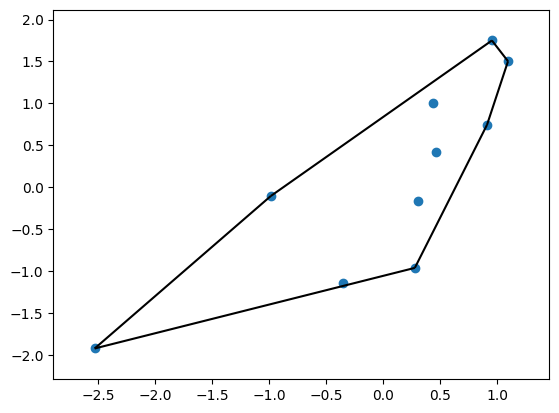

In [71]:
scipy.spatial.convex_hull_plot_2d(hull)
plt.savefig("../images/convexhull.pdf")

In [72]:
from scipy.spatial import Delaunay
tri = Delaunay(pts)
tri

In [73]:
dir(tri)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_transform',
 '_update',
 '_vertex_neighbor_vertices',
 '_vertex_to_simplex',
 '_vertices',
 'add_points',
 'close',
 'convex_hull',
 'coplanar',
 'equations',
 'find_simplex',
 'furthest_site',
 'good',
 'lift_points',
 'max_bound',
 'min_bound',
 'ndim',
 'neighbors',
 'npoints',
 'nsimplex',
 'paraboloid_scale',
 'paraboloid_shift',
 'plane_distance',
 'points',
 'simplices',
 'transform',
 'vertex_neighbor_vertices',
 'vertex_to_simplex',
 'vertices']

In [74]:
tri.simplices

array([[8, 9, 5],
       [4, 8, 5],
       [9, 8, 2],
       [8, 4, 2],
       [4, 1, 2],
       [6, 1, 3],
       [0, 6, 3],
       [6, 0, 9],
       [7, 9, 2],
       [7, 6, 9],
       [1, 7, 2],
       [7, 1, 6]], dtype=int32)

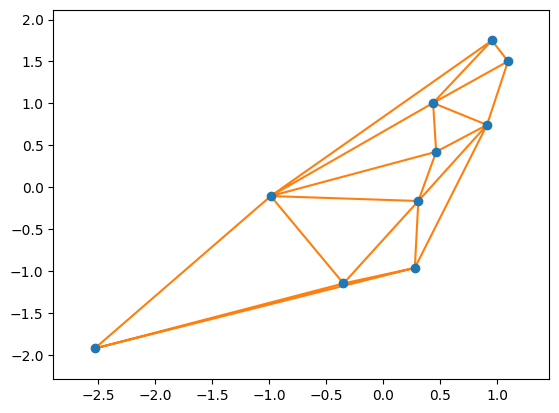

In [75]:
scipy.spatial.delaunay_plot_2d(tri)
plt.savefig("../images/delaunay.pdf")

In [76]:
from scipy.spatial import Voronoi
vor = Voronoi(pts)
vor

In [77]:
dir(vor)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_ridge_dict',
 '_update',
 'add_points',
 'close',
 'furthest_site',
 'max_bound',
 'min_bound',
 'ndim',
 'npoints',
 'point_region',
 'points',
 'regions',
 'ridge_dict',
 'ridge_points',
 'ridge_vertices',
 'vertices']

In [78]:
vor.vertices

array([[ -1.56917821,  -1.17533646],
       [  7.94738786, -27.97463108],
       [ -0.3550644 ,  -0.43215628],
       [ -0.18923926,  -0.54294902],
       [  1.98860973,  -0.62693469],
       [  0.83175084,   1.16435674],
       [  0.64483401,   1.41151497],
       [ -2.98645423,   3.92780753],
       [ -0.32091034,   0.31844817],
       [ -0.44985535,   0.67296975],
       [  1.15930838,  -0.07624587],
       [  0.58645847,   0.72116788]])

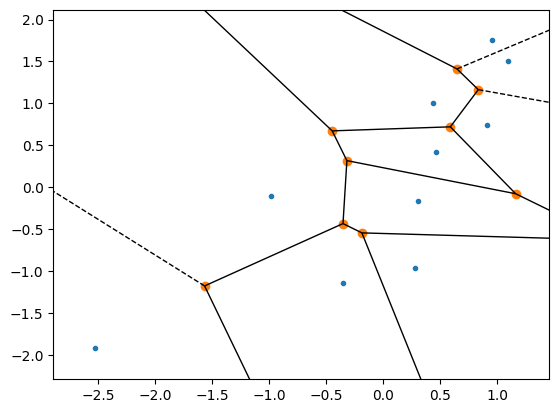

In [79]:
scipy.spatial.voronoi_plot_2d(vor)
plt.savefig("../images/veronoid.pdf")

In [80]:
scipy.__version__

'1.10.1'